## Import libraries and intitialize all parameters

In [44]:
from mundilib import MundiCatalogue
from utils import height2width
from PIL import Image
import requests
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from map_utils import classification_mask, create_path_map

# Init wms
c = MundiCatalogue()
wms = c.get_collection("Sentinel2").mundi_wms('L2A')

In [ ]:
def height2width(bbox, height):
    """Get optimized width for a given height regarding a known bbox"""
    x1 = bbox[0]
    y1 = bbox[1]
    x2 = bbox[2]
    y2 = bbox[3]
    return int(height * (x2 - x1) / (y2 - y1))

In [3]:
bbox = (1.0, 43.0, 1.3, 43.3)
_projection_ = 'EPSG:4326'
_bbox_       = bbox
_time_       = '2023-02-06/2023-02-10'
_height_     = 512
_width_      = height2width(_bbox_, _height_)

start  (85, 85)
end  (119, 136)
[(85, 85), (86, 85), (87, 85), (88, 85), (89, 86), (90, 87), (91, 87), (92, 87), (93, 86), (94, 87), (95, 88), (96, 89), (97, 90), (98, 91), (99, 92), (100, 93), (101, 94), (102, 95), (103, 96), (104, 97), (105, 98), (106, 98), (107, 97), (108, 96), (109, 95), (110, 95), (111, 95), (112, 94), (113, 95), (114, 96), (115, 97), (116, 98), (117, 99), (118, 100), (119, 101), (119, 102), (119, 103), (119, 104), (119, 105), (120, 106), (119, 107), (119, 108), (118, 109), (117, 110), (116, 111), (115, 112), (114, 113), (113, 114), (112, 114), (111, 114), (110, 114), (109, 115), (108, 115), (107, 116), (106, 117), (105, 118), (104, 119), (104, 120), (103, 121), (102, 122), (102, 123), (103, 124), (104, 124), (105, 125), (106, 126), (107, 127), (108, 128), (109, 129), (110, 130), (111, 131), (112, 132), (113, 133), (114, 134), (115, 134), (116, 134), (117, 134), (118, 134), (119, 134), (120, 135), (119, 136)]


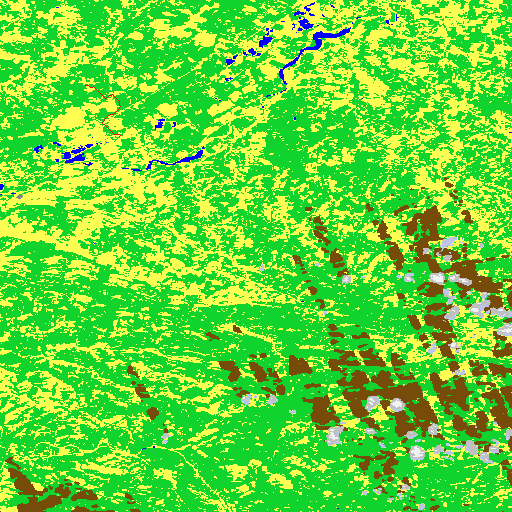

In [5]:
img_scl = wms.getmap(layers=['SCL'],
                 srs=_projection_,
                 bbox=_bbox_,
                 size=(_width_, _height_),
                 format='image/png',
                 time=_time_,
                 showlogo=False,
                 transparent=False)

scl_array = np.asarray(Image.open(img_scl))

start = (1.05, 43.05)
end = (1.07, 43.08)
bbox = bbox
path = create_path_map(start, end, scl_array, bbox, 512)

writable_array = scl_array.copy()
unique = set()
for (x, y) in path:
    unique.add(tuple(writable_array[y, x][:].tolist()))
    writable_array[y, x][:] = [255, 0, 0]
print(path)
display(Image.fromarray(writable_array))



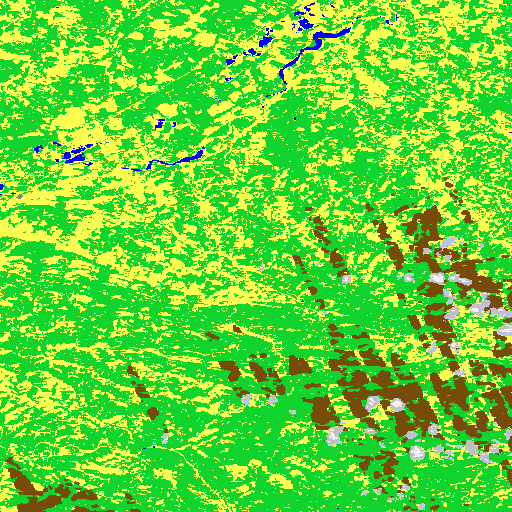

In [51]:
img = wms.getmap(layers=['SCL'],
                 srs=_projection_,
                 bbox=_bbox_,
                 size=(_width_, _height_),
                 format='image/png',
                 time=_time_,
                 showlogo=False,
                 transparent=False)

display(Image.open(img))
Image.open(img).save("terrain.png")

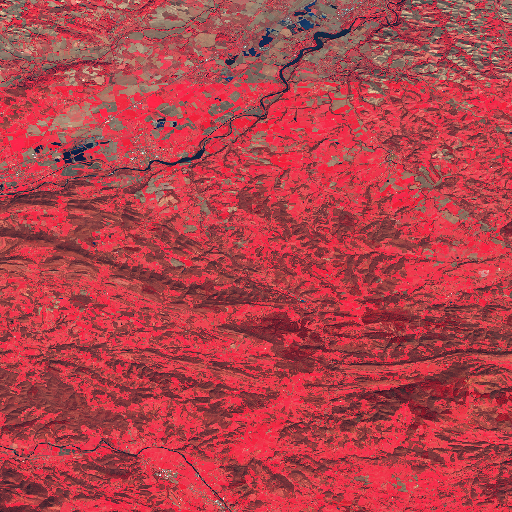

In [50]:
s2wms = c.get_collection("Sentinel2").mundi_wms('L1C')
img = s2wms.getmap(layers = ["2_COLOR_INFRARED__VEGETATION_"],
                     srs = _projection_,
                     bbox = _bbox_,
                     size = (_width_, _height_),
                     format ='image/png',
                     showlogo = False,
                     transparent=False)

display(Image.open(img))
Image.open(img).save("red.png")

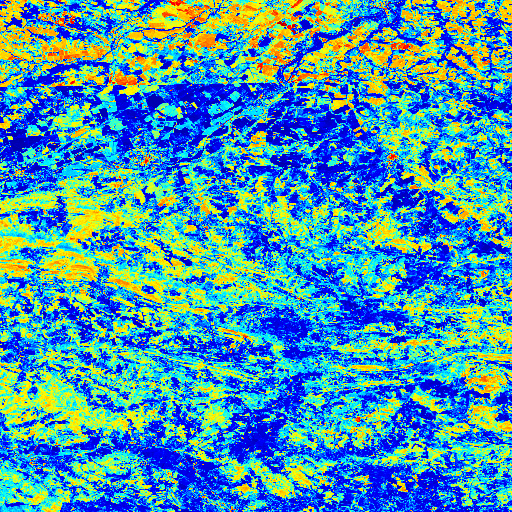

In [49]:
img = s2wms.getmap(layers = ["6_MOISTURE_INDEX"],
                     srs = _projection_,
                     bbox = _bbox_,
                     size = (_width_, _height_),
                     format ='image/png',
                     showlogo = False,
                     transparent=False)

display(Image.open(img))
Image.open(img).save("moisture.png")